In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()
data['month'] = label_encoder.fit_transform(data['month'])
data['day'] = label_encoder.fit_transform(data['day'])
data['size_category'] = label_encoder.fit_transform(data['size_category'])

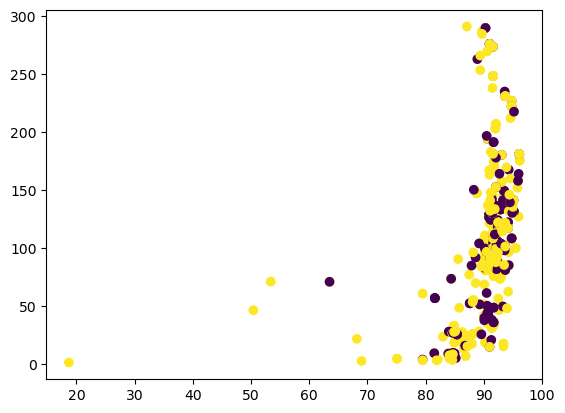

In [31]:
plt.scatter(data["FFMC"], data["DMC"], c=data["size_category"])

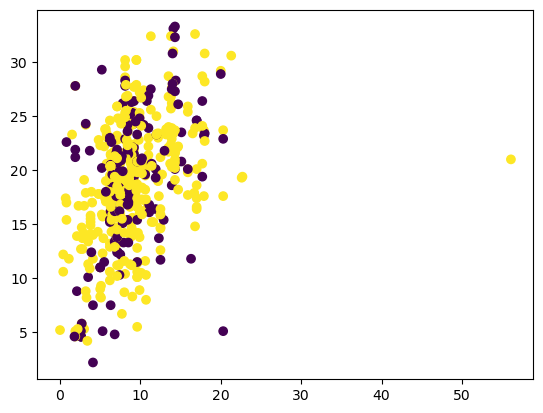

In [32]:
plt.scatter(data["ISI"], data["temp"], c=data["size_category"])

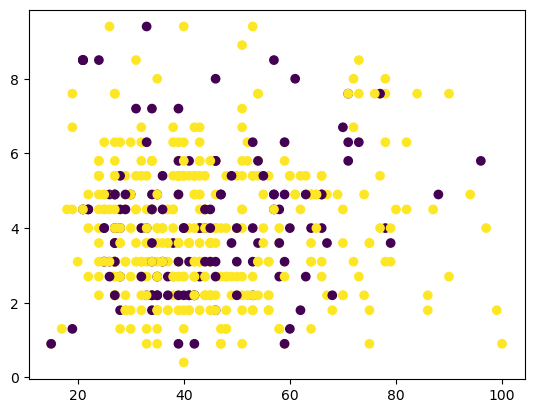

In [33]:
plt.scatter(data["RH"], data["wind"], c=data["size_category"])

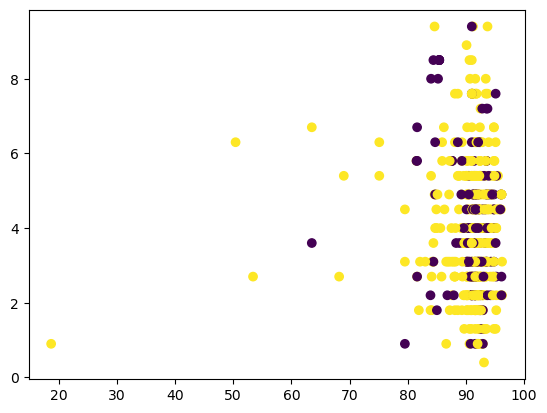

In [35]:
plt.scatter(data["FFMC"], data["wind"], c=data["size_category"])

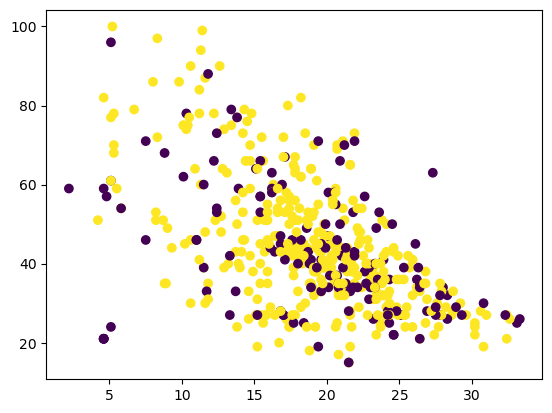

In [36]:
plt.scatter(data["temp"], data["RH"], c=data["size_category"])

In [16]:
X = data.drop(columns=['size_category'])  # Features
y = data['size_category']  # Target variable

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((413, 30), (413,), (104, 30), (104,))

In [19]:
clf = SVC(kernel='linear', gamma = 0.0001)
clf.fit(X_train, y_train)

SVC(gamma=0.0001, kernel='linear')

In [21]:
y_pred = clf.predict(X_test)
y_pred

array(['small', 'large', 'large', 'small', 'small', 'large', 'small',
       'small', 'large', 'small', 'small', 'large', 'large', 'large',
       'large', 'small', 'large', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'large', 'small', 'large', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'large', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'large',
       'small', 'small', 'small', 'large', 'large', 'small', 'small',
       'small', 'sma

In [22]:
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy=", acc)

Accuracy= 99.03846153846155


In [23]:
confusion_matrix(y_test, y_pred)

array([[25,  1],
       [ 0, 78]], dtype=int64)

## Grid Search CV 

In [24]:
clf = SVC()
param_grid = [{'kernel':["linear"], 'gamma':[50, 10, 5, 1, 0.5, 0.001, 0.0001, 0.00001], 'C':[1, 15, 14, 13, 12, 11, 10, 0.1]}]
gsv = GridSearchCV(clf, param_grid, cv=10)
gsv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 10, 5, 1, 0.5, 0.001, 0.0001, 1e-05],
                          'kernel': ['linear']}])

In [26]:
gsv.best_params_, gsv.best_score_

({'C': 1, 'gamma': 50, 'kernel': 'linear'}, 0.9854819976771196)

In [27]:
clf = SVC(C= 1, kernel='linear', gamma = 50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy=", acc)
confusion_matrix(y_test, y_pred)

Accuracy= 99.03846153846155


array([[25,  1],
       [ 0, 78]], dtype=int64)

In [28]:
clf = SVC(C= 1, kernel='linear', gamma = 50)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
acc = accuracy_score(y_train, y_pred_train)*100
print("Accuracy=", acc)

Accuracy= 100.0


<Axes: xlabel='size_category', ylabel='count'>

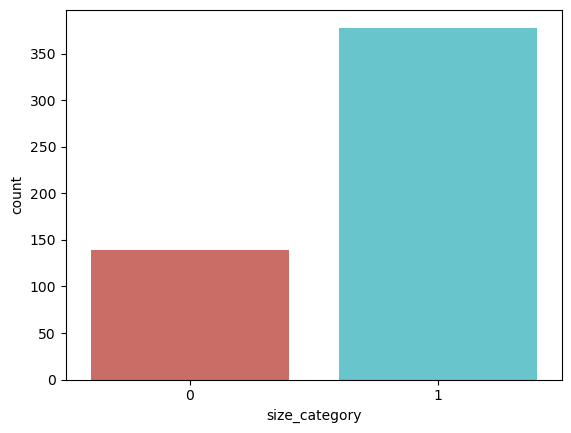

In [37]:
import seaborn as sns
sns.countplot(x="size_category" ,data=data ,palette="hls")